# Fitting polynomial models to data

This is NOT a maths course. The aim of this notebook is to provide enough guidance and practical advice, so that an appropriate model can be chosen to fit a dataset. Start by asking yourself some questions.  
**Are all my data OK, and what range am I interested in?**  
**What type of model might I expect?**  
**What shape of curve looks like it fits acceptably?**  
(Note that statistical measures of fit should also usually be considered)

In [1]:
''' Import modules and load data'''

import numpy as np
import matplotlib.pyplot as plt

t = np.load('t.npy')
N = np.load('N.npy')
E = np.load('E.npy')
gdpPerCapita = np.load('gdpPerCapita.npy')
energyPerCapita = np.load('energyPerCapita.npy')
energyPerDollar = np.load('energyPerDollar.npy')

## Polynomial models
### Constant value

\begin{equation}  y = C_0  \end{equation}  

The simplest model to fit to your data is simply that there is some underlying constant value. 

Measurement error or real fluctuations may result in variability in your data. The obvious and most commonly used approach is to simply find the mean value of a numpy array of observations, e.g.  
`C = yObservations.mean()`. 

However, not all data are perfect! What if there are measurement errors (producing wildly wrong values), or other infrequent processes interrupt normal observations (e.g. a truck drove past your measurement site)? Maybe you need to remove outliers?  
One way to do this is to take the median value, e.g.  
`C = yObservations.median()`.  

Alternatively, take the mean and then remove all values that are extreme (e.g. >3 standard deviations from the mean). If you know some rule to find anomalous values, you can manually deselect invalid data, e.g. if you have some invalid zero values  
`C = yObservations[yObservations != 0].mean()`.

**These considerations ALWAYS apply: first filter to only use relevant/valid data.**


### Linear fit

\begin{equation}  y = C_0 + C_1 x \end{equation}  

A straight line (polynomial of order 1) is probably the starting point for any analysis of bivariate data (two variables/observables $x,y$).  

We use numpy to solve real-world problems in steps.  

**Step 1:** Fit observed data to find model parameters  
`modelParameters = np.polyfit(xObservations,yObservations,1)`  
this generates a list object [$C_1,C_0$]

**Step 2:** Define a generalized function $f$, based on the model parameters, that can compute  $y=f(x)$ at any $x$.  
`modelFunction = np.poly1d(modelParameters)`

**Step 3:** Generate model values of $y$ at specific values of $x$ that you are interested in.  
`yModelValues = modelFunction(xValues)`

### Generalized polynomial

\begin{equation}  y = C_0 + C_1 x + ... + C_nx^n\end{equation}  

The complexity of the model can be increased by increasing the order ($n$) of the polynomial. Quadratic ($n=2$), cubic ($n=3$), etc. The `list` of model parameters simply increases in length [$C_n,...,C_1,C_0$].

Try experimenting with the data below to see how this works. Note how wild the extrapolations are as you increase the order of the polynomial or change the range of dates.

t[select] = [1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010.]
energyPerCapita[select] = [13.373834   13.77924251 14.16242871 14.52256106 14.85846916 15.16975182
 15.5306445  15.71018158 16.18046666 16.77163993 17.31346957 17.57814454
 18.03087694 18.57874488 18.24178882 17.95224078 18.48531991 18.70629177
 18.89622081 19.13934672 18.65376116 18.20139036 17.78057006 17.67996316
 18.06028665 18.09008097 18.109049   18.33471222 18.60195174 18.6254682
 18.49071834 18.28501858 18.1379591  17.96173136 17.93331338 17.98244157
 18.23251195 18.17563091 18.0403514  18.11581709 18.29457919 18.25331883
 18.38146137 18.78539485 19.32600081 19.67790568 19.92921743 20.26971929
 20.18889098 19.63401782 20.2247988 ]
modelParameters = [ 2.9448714

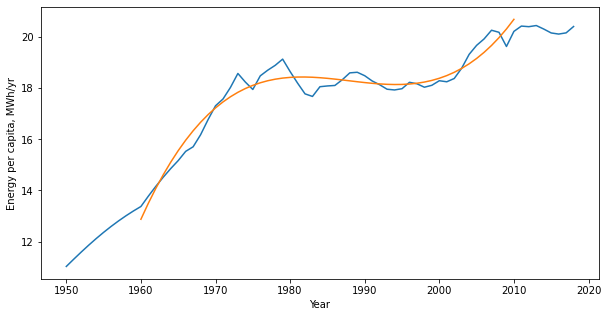

In [2]:
# model definition, and data range to fit
polynomialOrder = 3
startYear = 1960
endYear = 2010

validYear = np.logical_and(t >= startYear, t <= endYear)
validNumber = np.logical_not(np.isnan(energyPerCapita))
select = np.logical_and(validYear, validNumber)

print('t[select] =', t[select])
print('energyPerCapita[select] =', energyPerCapita[select])

modelParameters = np.polyfit(t[select],energyPerCapita[select],polynomialOrder)
print('modelParameters =',modelParameters)

modelFuncEnergyPC = np.poly1d(modelParameters)

plt.figure(figsize=[10,5])
plt.plot(t, energyPerCapita)
plt.plot( t[select], modelFuncEnergyPC(t[select]) )

# uncomment the next line to see a future extrapolation
#plt.plot(t, modelFuncEnergyPC(t) )

plt.xlabel('Year')
plt.ylabel('Energy per capita, MWh/yr')
plt.show()

## Growth and decay (exponential) models

In our previous notebooks, we introduced the idea that growth models commonly take the form

\begin{equation}  \frac{dN}{dt} = k N  \end{equation} 

We can make a subsitition 

\begin{equation} y = \ln(N) \end{equation}
differentiating
\begin{equation} \frac{dy}{dN} = \frac{1}{N} \end{equation} 

And so $dN = N dy$ leads to

\begin{equation}  \frac{dN}{dt} = k N  \end{equation} 

It is not always straightforward to find an analytical solution, because $k$ may be a function of $t$ or/and $y$.
  
However, in the simple case that k is a constant.

\begin{equation} y = C_0 + k t \end{equation}

So, if we were to plot $x = t$ against $y = \ln(N)$, we could fit a straight line (with $C_1 = k$). 

If we assume $k$ is only a function of $t$, we can plot $(x=t, y=\ln N)$ to find arbitrarily complex polynomial models for $k(t)$. 

To transform back from y to N, we use the inverse of the $\ln()$ function, which is $\exp()$, applied to both sides of the equation.  

\begin{equation} N = \exp(y) = \exp(C_0 + k t) \end{equation}

Let's illustrate this by looking again at the human population curve. Play with increasing the polynomial order, to fit the observations more precisely, or change the start year of data to fit.


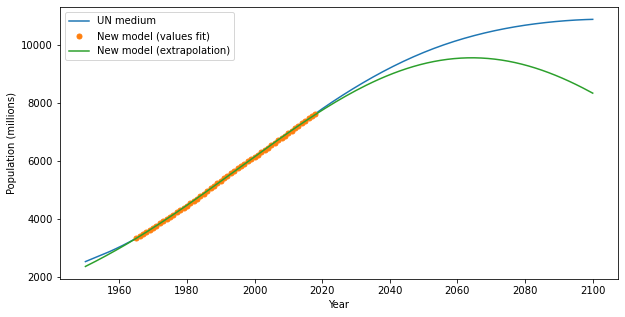

In [3]:
# model definition, and data range to fit
polynomialOrder = 2
startYear = 1965
endYear = 2018

validYear = np.logical_and(t >= startYear, t <= endYear)

y = np.log(N)

modelParameters = np.polyfit(t[validYear],y[validYear],polynomialOrder)
modelFunction = np.poly1d(modelParameters)
modelValues = np.exp(modelFunction(t))

plt.figure(figsize=[10,5])
plt.plot(t, N, label='UN medium')
plt.plot(t[validYear], N[validYear],label='New model (values fit)',
         marker='o',markersize=5,linewidth=0)
plt.plot(t, modelValues, label='New model (extrapolation)')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.legend()
plt.show()

## Logistic growth

Verhulst (1838) read Thomas Malthus "An Essay on the Principle of Population" and derived his **logistic equation** to describe the self-limiting growth of a biological population constrained by available resources (e.g. space available for bacteria in a small dish). It has been used to describe many growth processes that are limited by some maximum value. It is only a slight variation on the differential equation above.

\begin{equation}  \frac{dN}{dt} = k N \left(1 - \frac{N}{P} \right) \end{equation} 

$P$ is the "carrying capacity" of the system, or maximum sustainable population, and $k$ is a growth rate parameter. At small populations ($N<<P$), growth is close to "normal" exponential form (as above), but the population stabilises and growth becomes very small if the population approaches the carrying capacity ($N \rightarrow P$). If the population gets above the carrying capacity, then it self-corrects (growth becomes negative).

If $P$ and $k$ are constants, then the logistic differential equation has solution

\begin{equation} N = \frac{P}{1 + \left( \frac{P-N_0}{N_0}  \right) \exp(-kt)} \end{equation} 

Where $N_0$ is the population at $t=0$.

Let's take a look at what the function looks like...

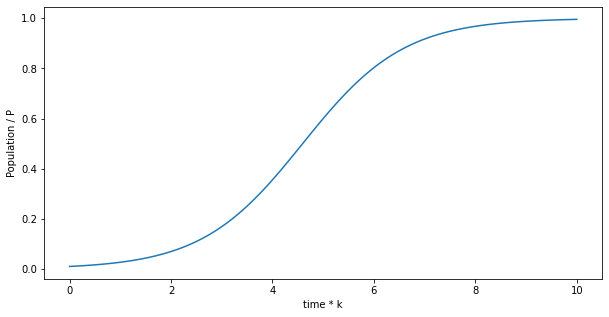

In [4]:
def logisticGrowthAnalytic(k,P,N0,t):
    '''
    Given the growth rate (k), carrying capacity (P), and initial population
    value (N0), generate an array of population (N) at various times (t), 
    based on analytical solution of the logistic growth equation. 
    Assumes k and P are not functions of t or N.

    Parameters
    ----------
    k : float
        Growth rate parameter.
    P : float
        Carrying capacity.
    N0 : float
        Initial population value (t=0).
    t : ndarray
        Time array.

    Returns
    -------
    N : ndarray
        Population value at time t

    '''
    return P / (1 + ((P-N0)/N0)*np.exp(-k*t))

k  = 1
P  = 1
N0 = 0.01
time = np.linspace(0,10,100)
value = logisticGrowthAnalytic(k,P,N0,time)

plt.figure(figsize=[10,5])
plt.plot(time,value)
plt.xlabel('time * k')
plt.ylabel('Population / P')
plt.show()

## Logistic growth as a special case of a polynomial model

We can consider logistic growth as a special case of a polynomial model

\begin{equation}  z = \frac{1}{N}\frac{dN}{dt} = C_0 + C_1 N \end{equation} 

The logistic model has $C_0 = k$ and $C_1 = -k/P$.

Below you can see the human population data (since 1950) and UN medium-variant projection plotted in this way. It does seem quite close to a logistic model (i.e. straight line in this form).

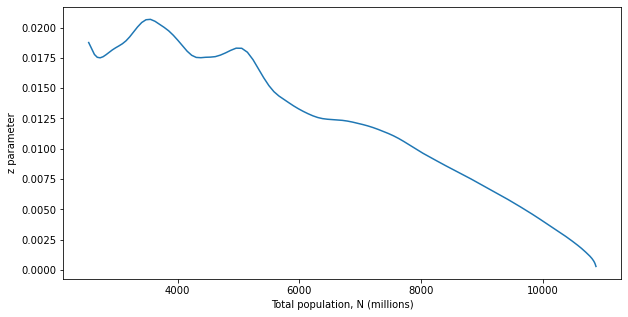

In [21]:
dt = t[1]-t[0]
dN = np.gradient(N)
z = (1/N)*(dN/dt)

plt.figure(figsize=[10,5])
plt.plot(N, z)
plt.xlabel('Total population, N (millions)')
plt.ylabel('z parameter')
plt.show()

## Diffusion of innovation

We live in a time of transition. A time when new technologies will spread through our society and change us. How fast will they spread? The logistic model has been shown to be a useful way of modeling this. Technology uptake is initially exponential, but eventually saturates at some maximum value that reflects natural limits on the size of the market.

Consider the spread of solar and wind (and other new technologies) to replace fossil fuels. If we know the total size of the need, then maybe such a growth model may be appropriate: rapid (exponential growth) early during innovation uptake, and then slower (exponential decay) as the most difficult circumstances are finally solved.

See e.g. https://en.wikipedia.org/wiki/Diffusion_of_innovations
